In [21]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data/AAPL.csv")

In [7]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")

In [10]:
df = df[-250:]

In [11]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,SMA20
Date,,,,,,,,,,,,,
2016-12-02,109.17,110.09,108.85,109.90,26527997.0,0.0,1.0,107.821591,108.730228,107.505543,108.542574,26527997.0,108.627512
2016-12-05,110.00,110.03,108.25,109.11,34324540.0,0.0,1.0,108.641339,108.670969,106.912954,107.762332,34324540.0,108.640845
2016-12-06,109.50,110.36,109.19,109.95,26195462.0,0.0,1.0,108.147515,108.996893,107.841344,108.591957,26195462.0,108.618130
2016-12-07,109.26,111.19,109.16,111.03,29998719.0,0.0,1.0,107.910479,109.816641,107.811715,109.658617,29998719.0,108.616648
2016-12-08,110.86,112.43,110.60,112.12,27068316.0,0.0,1.0,109.490717,111.041325,109.233928,110.735154,27068316.0,108.677882


### SMA - Simple Moving Average

A simple moving average (SMA) is an arithmetic moving average calculated by adding recent prices and then dividing that figure by the number of time periods in the calculation average. For example, one could add the closing price of a security for a number of time periods and then divide this total by that same number of periods. Short-term averages respond quickly to changes in the price of the underlying security, while long-term averages are slower to react. 

In [12]:
df["SMA20"] = df["Adj. Close"].rolling(window = 20).mean()

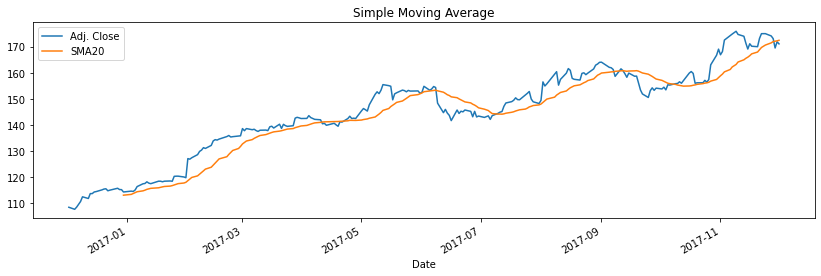

In [15]:
df[["Adj. Close","SMA20"]].plot(figsize = (14,4),title  = "Simple Moving Average");

### EMA - Expopnential Moving Average

An exponential moving average (EMA) is a type of moving average (MA) that places a greater weight and significance on the most recent data points. The exponential moving average is also referred to as the exponentially weighted moving average. An exponentially weighted moving average reacts more significantly to recent price changes than a simple moving average (SMA), which applies an equal weight to all observations in the period.

$EMA_{Today}=(Value_{Today}∗ \frac{Smoothing}{(1+Days)})+EMA_{Yesterday}∗(1−\frac{Smoothing}{(1+Days)})$

While there are many possible choices for the smoothing factor, the most common choice is:
Smoothing = 2


In [19]:
df["EMA20"] = df["Adj. Close"].ewm(span=20).mean()

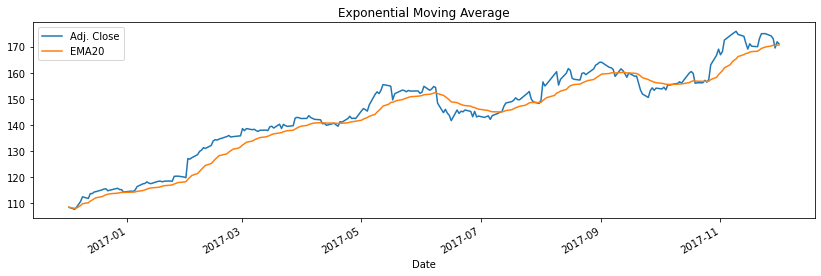

In [34]:
df[["Adj. Close","EMA20"]].plot(figsize = (14,4),title  = "Exponential Moving Average");

### WMA - Expopnential Moving Average

An exponential moving average (EMA) is a type of moving average (MA) that places a greater weight and significance on the most recent data points. The exponential moving average is also referred to as the exponentially weighted moving average. An exponentially weighted moving average reacts more significantly to recent price changes than a simple moving average (SMA), which applies an equal weight to all observations in the period.

In [45]:
np.random.seed(105)
w = np.random.random(20)
weights = w/sum(w)
print(f"Sum of Weights {sum(weights):.2f}")

Sum of Weights 1.00


In [46]:
weights 

array([0.00994115, 0.03959207, 0.10201808, 0.01254657, 0.0635883 ,
       0.00756088, 0.0352386 , 0.00026654, 0.05355405, 0.10489856,
       0.06850517, 0.02954542, 0.04054734, 0.00833356, 0.06392488,
       0.0623826 , 0.09720313, 0.08147747, 0.07490502, 0.0439706 ])

In [47]:
df["WMA20"] = df["Adj. Close"].rolling(20)\
.apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)

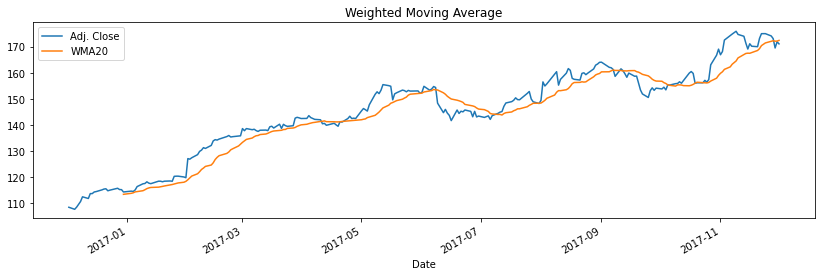

In [48]:
df[["Adj. Close","WMA20"]].plot(figsize = (14,4),title  = "Weighted Moving Average");

### SMA ,EMA , WMA

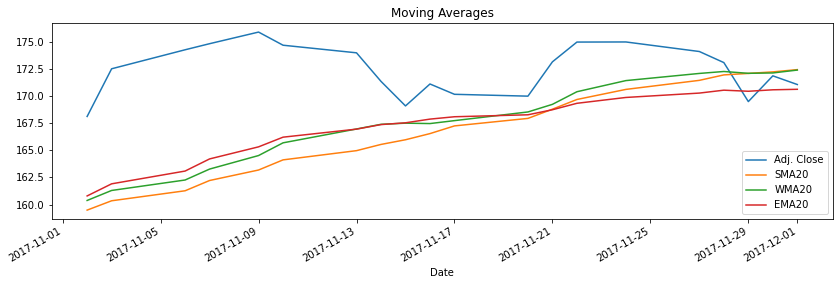

In [51]:
df[["Adj. Close","SMA20","WMA20","EMA20"]][-20:]\
.plot(figsize = (14,4),title  = "Moving Averages");